# Assignment - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [69]:
# stundent details example: John S. 9812

# student details 1: lidor E. 2612 
# student details 2: 

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3: 


AI agent name 2:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3: 

Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>




    
</pre>

## Part 2 - Data Loading and Exploratory Data Analysis

### Part 2.1 - Data Loading and Import
We start by setting up our environment and loading the diabetes dataset. We use pandas to read the CSV files because it's the most efficient way to handle structured data in Python. The dataset comes with both training and test sets, plus a description file that explains what each feature means - this is crucial for understanding our data.

We import matplotlib and seaborn for visualization since we'll need to create plots throughout our analysis. NumPy handles the mathematical operations we'll need for statistical analysis. We also use pathlib for file operations because it's more reliable than string-based paths.

The diabetes dataset has 353 training samples and 89 test samples, each with 11 features including the target variable. All features are already scaled and normalized, which saves us preprocessing work later.

In [70]:
# Load and validate diabetes datasets
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


sns.set_theme(style='whitegrid')
plt.rcParams['figure.dpi'] = 110

train_data = pd.read_csv('data/diabetes_train.csv')
test_data = pd.read_csv('data/diabetes_test.csv')

In [71]:
# Display sample data and data types
display(train_data.head())
print(train_data.dtypes)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,52.0,1.0,23.0,107.00,179.0,123.7,42.5,4.21,4.1589,93.0,50.0
1,22.0,1.0,18.6,97.00,114.0,57.6,46.0,2.00,3.9512,83.0,101.0
2,34.0,2.0,25.3,111.00,230.0,162.0,39.0,6.00,4.9767,90.0,181.0
3,38.0,2.0,26.8,105.00,181.0,119.2,37.0,5.00,4.8203,91.0,107.0
4,55.0,1.0,23.0,94.67,190.0,137.6,38.0,5.00,4.2767,106.0,146.0


age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


In [72]:
# Load and display dataset description
text_path = Path('data/diabetes_description.txt')
if text_path.exists():
    desc_text = text_path.read_text(encoding='utf-8')
    print(desc_text)
else:
    print(f"Description file not found at {text_path}")

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

### Part 2.2 - Exploratory Data Analysis (EDA)
Now we dive into understanding our data. First, we check the basic statistics and look for any missing values - thankfully there are none, which makes our job easier.

We create histograms to see how each feature is distributed, and boxplots to spot outliers. The boxplots use the IQR method, which is a standard statistical approach for outlier detection. When we find outliers, we clip them to the boundary values rather than deleting entire rows. This is because with only 353 samples, every data point is valuable for training our model.

For correlation analysis, we use Pearson correlation because all our features are continuous numbers and we want to see linear relationships. A heatmap makes it easy to spot which features are related to each other and to our target. 

We also check for multicollinearity - when features are highly correlated with each other (above 0.8), we identify these relationships for analysis. However, we'll handle feature selection and removal in Part 3 as part of our systematic feature engineering experiments.

Finally, we identify the top features that are most correlated with our target variable - these will likely be the most important for our model and will guide our feature engineering experiments in Part 3.

In [73]:
# Basic EDA - dataset overview and descriptive statistics
print(f"Dataset shapes -> train: {train_data.shape} | test: {test_data.shape} | sum: {(test_data.shape[0] + train_data.shape[0], test_data.shape[1])}" )
display(train_data.describe().T)
print("Missing values (train):")
print(train_data.isna().sum())

Dataset shapes -> train: (353, 11) | test: (89, 11) | sum: (442, 11)


,count,mean,std,min,25%,50%,75%,max
age,353.0,48.433428,13.362376,19.0000,38.0000,50.0000,59.0000,79.000
sex,353.0,1.461756,0.499243,1.0000,1.0000,1.0000,2.0000,2.000
bmi,353.0,26.365439,4.517617,18.0000,23.1000,25.7000,29.2000,42.200
bp,353.0,94.599518,14.118033,62.0000,84.0000,93.0000,105.0000,133.000
s1,353.0,189.977337,34.745332,110.0000,165.0000,187.0000,213.0000,301.000
s2,353.0,115.864306,30.427219,41.6000,96.0000,113.4000,135.6000,242.400
s3,353.0,50.228045,13.185724,22.0000,40.0000,49.0000,58.0000,99.000
s4,353.0,4.052635,1.292732,2.0000,3.0000,4.0000,5.0000,9.090
s5,353.0,4.636994,0.526080,3.2581,4.2767,4.5951,4.9767,6.107
s6,353.0,91.396601,11.340604,58.0000,83.0000,91.0000,98.0000,124.000


Missing values (train):
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


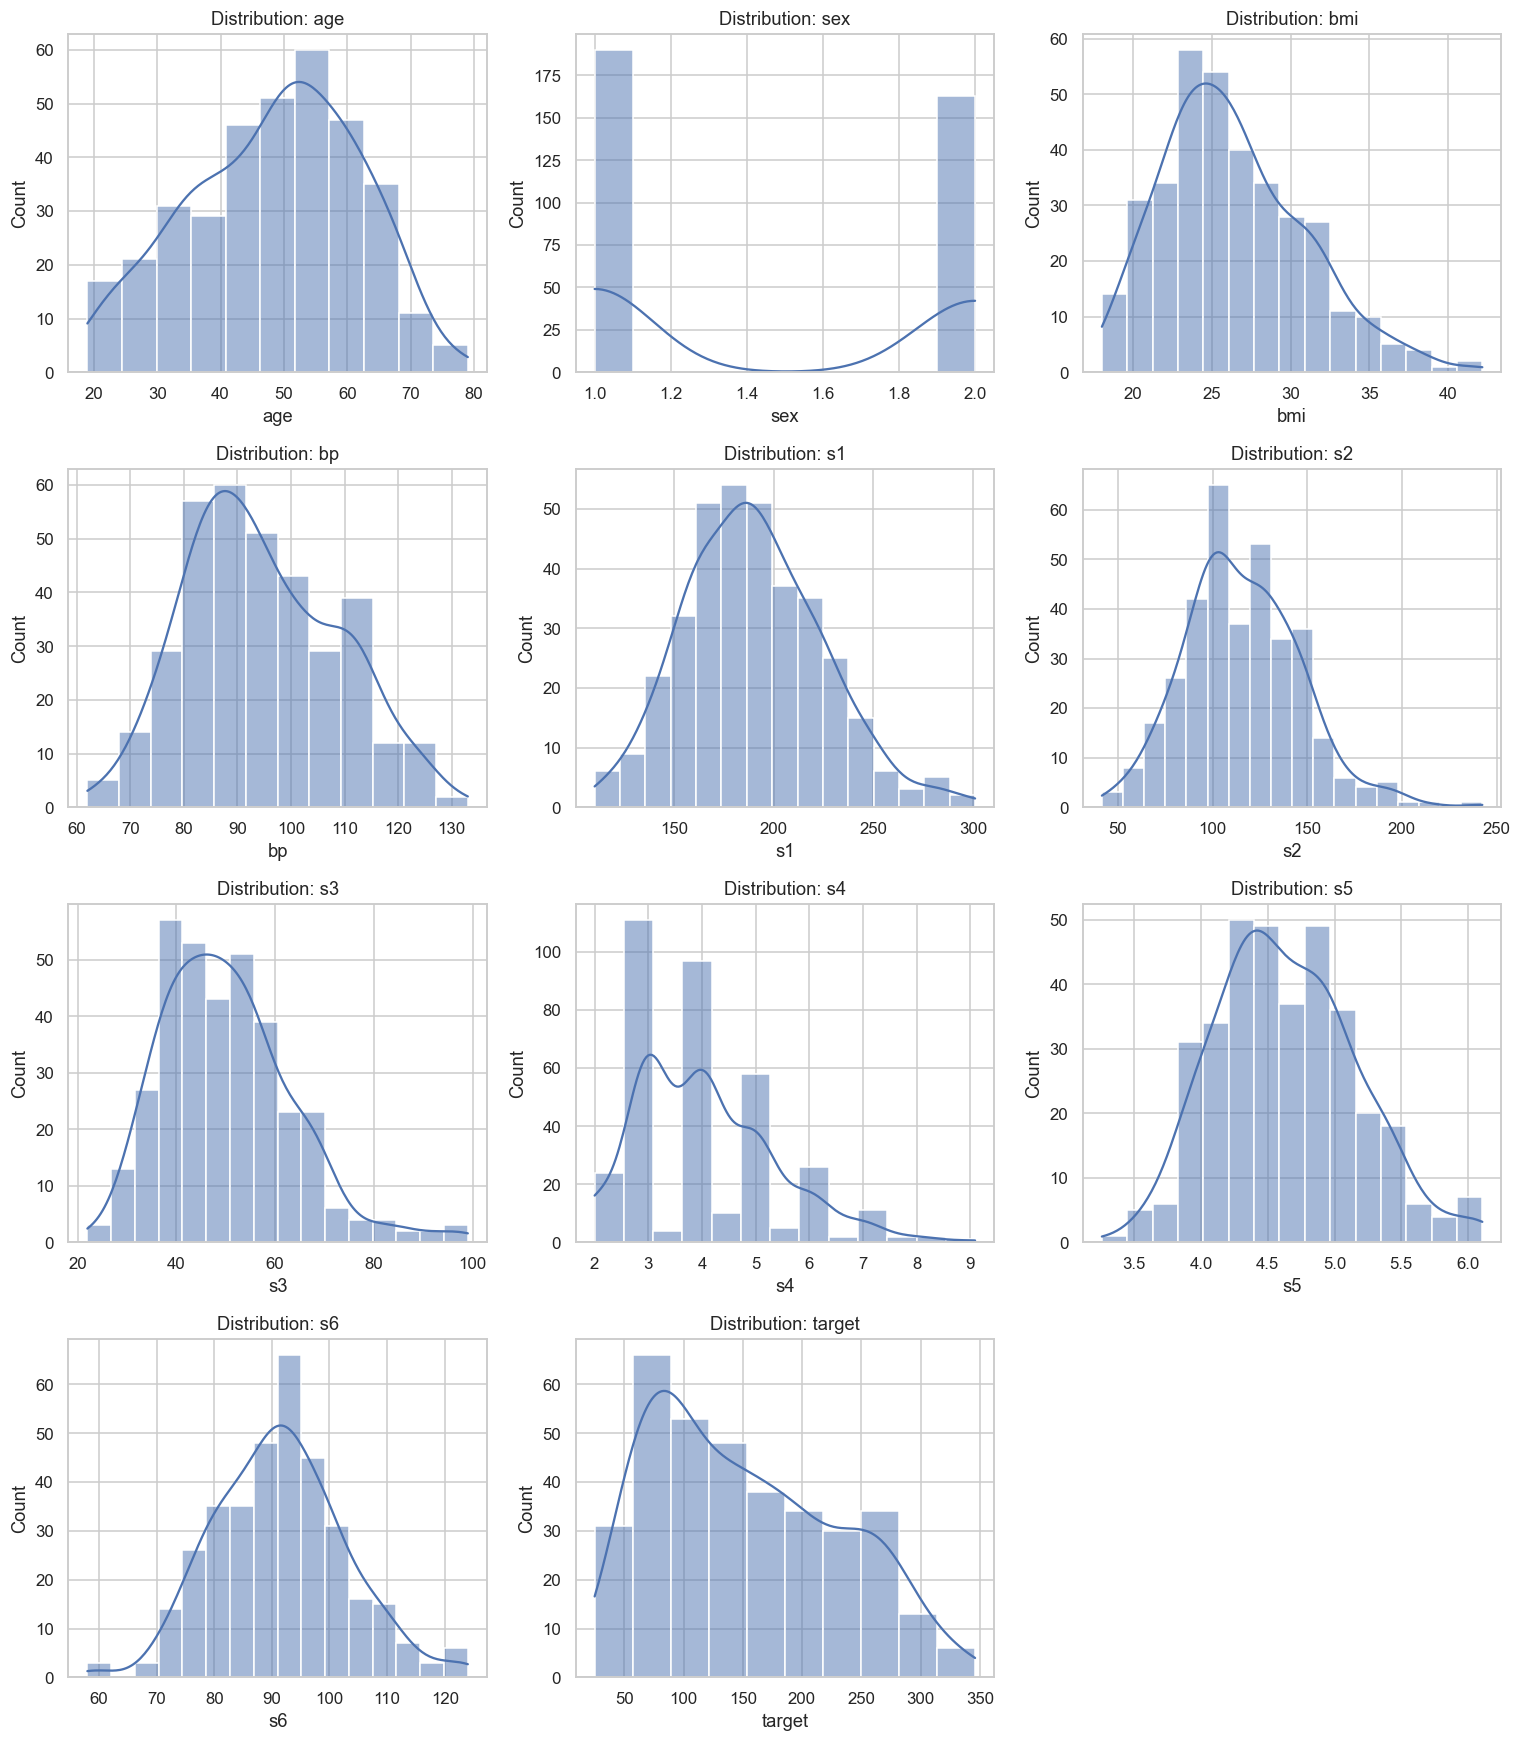

In [74]:
# Plot feature distributions using histograms
numeric_cols = train_data.select_dtypes(include=[np.number]).columns.tolist()
fig, axes = plt.subplots(nrows=int(np.ceil(len(numeric_cols)/3)), ncols=3, figsize=(14, 4*int(np.ceil(len(numeric_cols)/3))))
axes = axes.flatten()
for ax, col in zip(axes, numeric_cols):
    sns.histplot(train_data[col], kde=True, ax=ax)
    ax.set_title(f"Distribution: {col}")
for ax in axes[len(numeric_cols):]:
    ax.axis('off')
plt.tight_layout()
plt.show()

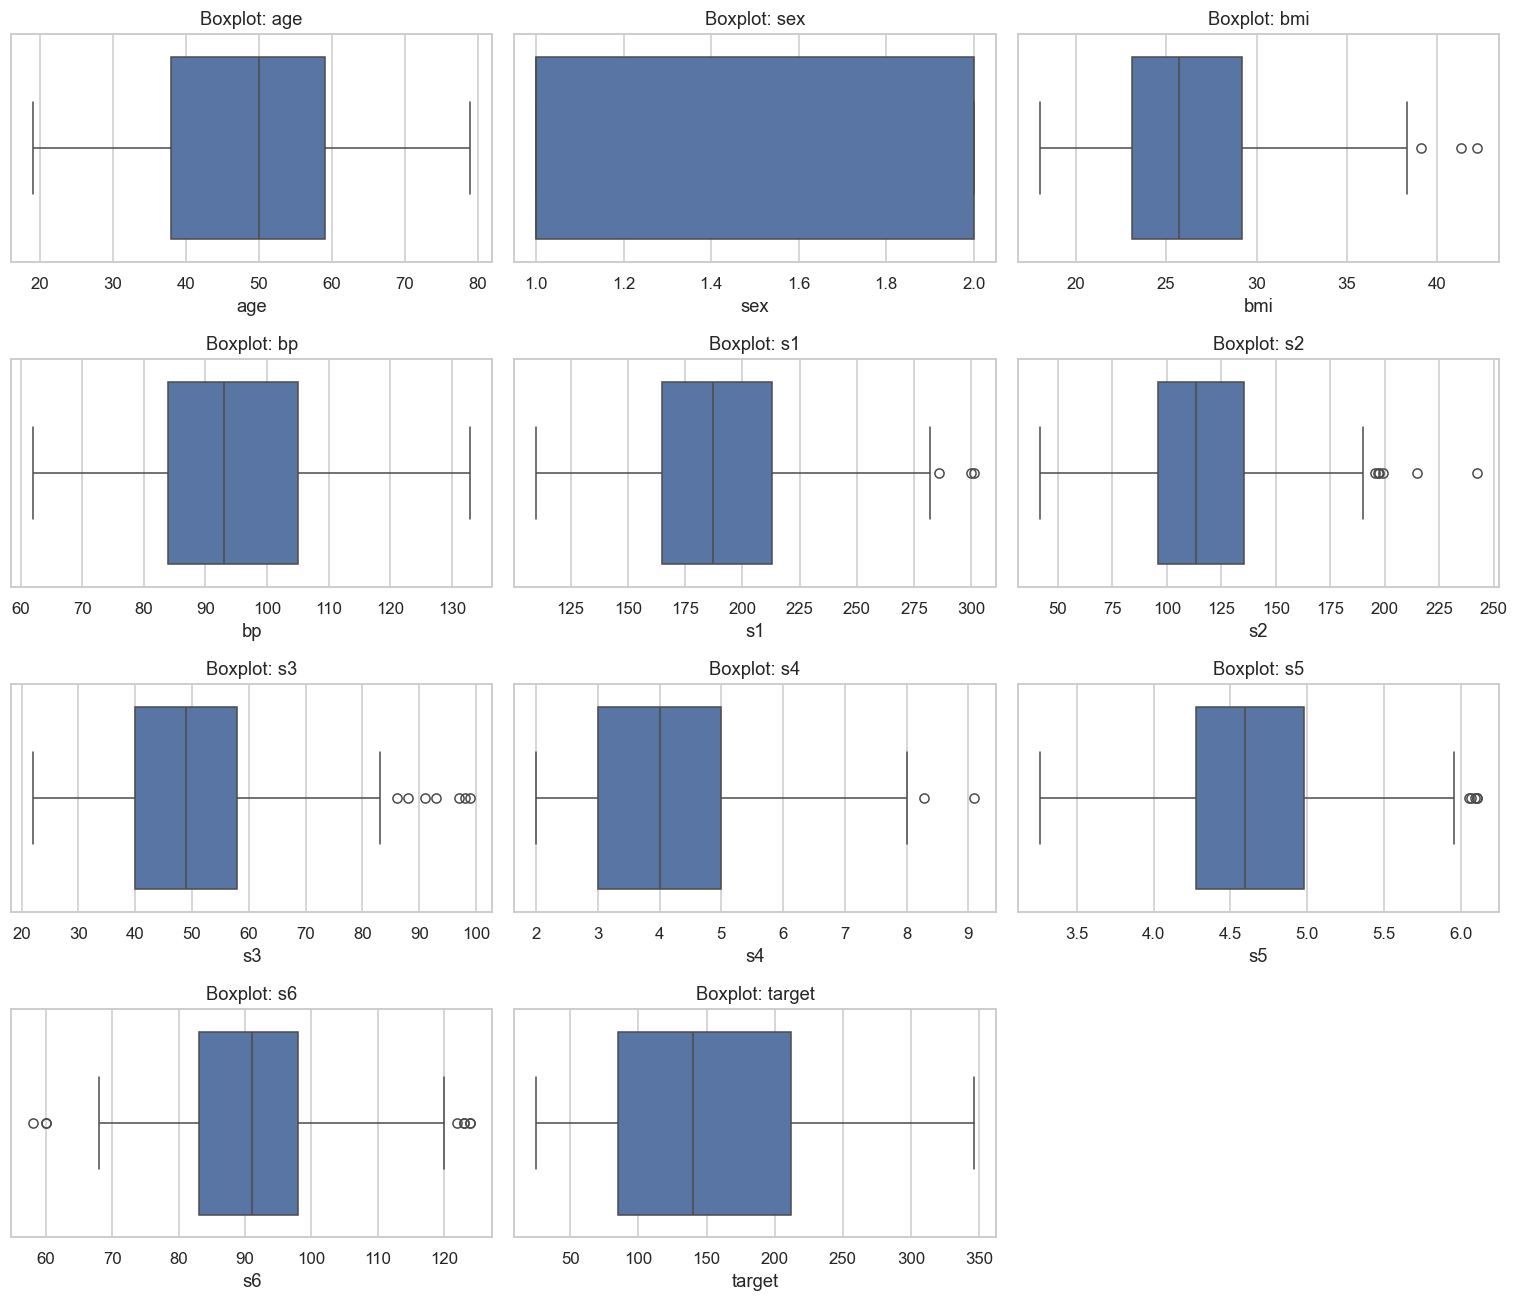

In [75]:
# Create boxplots to identify outliers using IQR method
fig, axes = plt.subplots(nrows=int(np.ceil(len(numeric_cols)/3)), ncols=3, figsize=(14, 3*int(np.ceil(len(numeric_cols)/3))))
axes = axes.flatten()
for ax, col in zip(axes, numeric_cols):
    sns.boxplot(x=train_data[col], ax=ax)
    ax.set_title(f"Boxplot: {col}")
for ax in axes[len(numeric_cols):]:
    ax.axis('off')
plt.tight_layout()
plt.show()

In [76]:
# Apply outlier treatment using clipping to preserve all data points
train_data_cleaned = train_data.copy()
for col in numeric_cols:
    Q1 = train_data[col].quantile(0.25)
    Q3 = train_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train_data_cleaned[col] = train_data_cleaned[col].clip(lower=lower_bound, upper=upper_bound)

print(f"Original shape: {train_data.shape}")
print(f"Cleaned shape: {train_data_cleaned.shape}")

Original shape: (353, 11)
Cleaned shape: (353, 11)


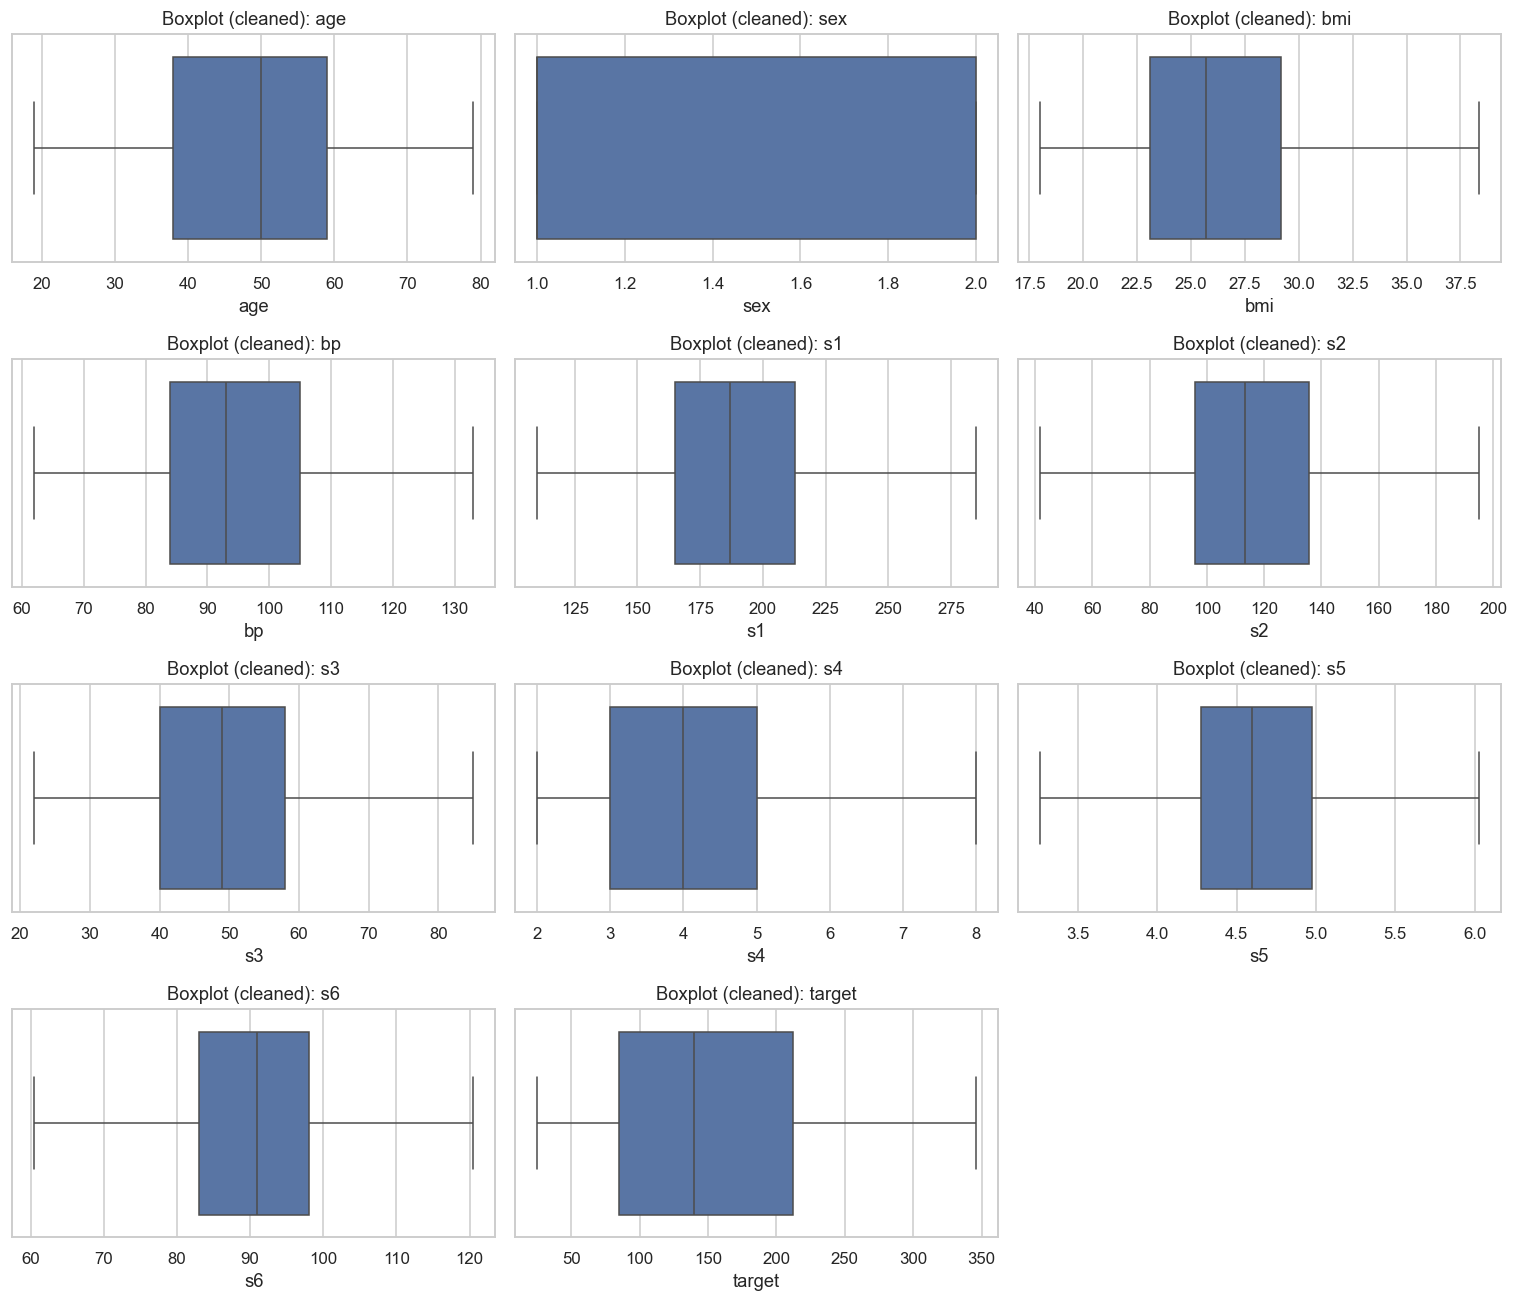

In [77]:
# Verify outlier treatment by creating new boxplots of cleaned data
fig, axes = plt.subplots(nrows=int(np.ceil(len(numeric_cols)/3)), ncols=3, figsize=(14, 3*int(np.ceil(len(numeric_cols)/3))))
axes = axes.flatten()
for ax, col in zip(axes, numeric_cols):
    sns.boxplot(x=train_data_cleaned[col], ax=ax)
    ax.set_title(f"Boxplot (cleaned): {col}")
for ax in axes[len(numeric_cols):]:
    ax.axis('off')
plt.tight_layout()
plt.show()

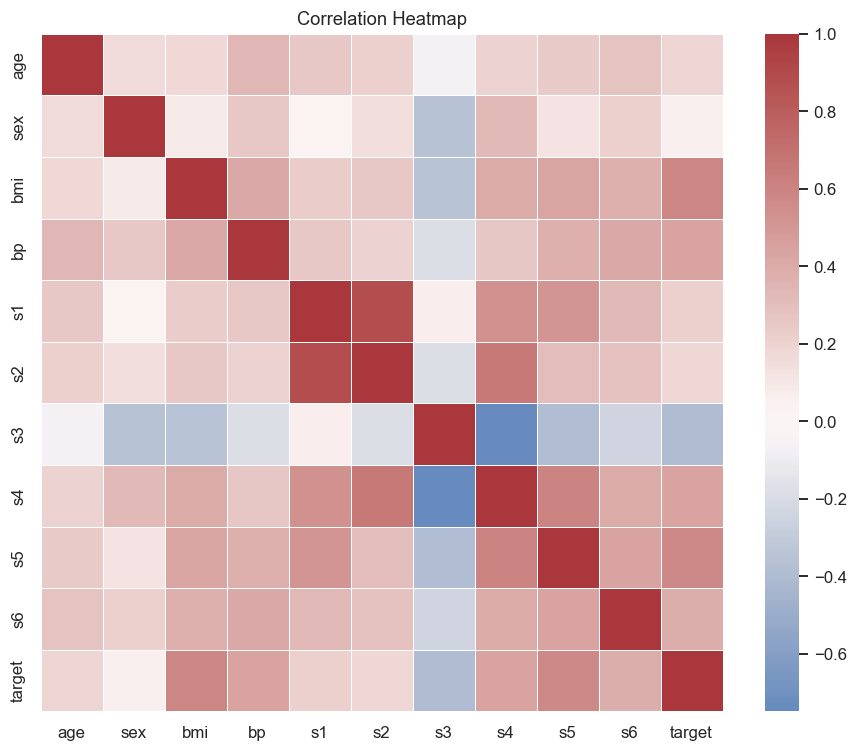

In [78]:
# Create correlation heatmap using Pearson correlation
corr = train_data_cleaned[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="vlag", center=0, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [79]:
# Check for multicollinearity by finding highly correlated feature pairs
feature_correlations = corr.abs()
high_corr_pairs = []
threshold = 0.8

for i in range(len(feature_correlations.columns)):
    for j in range(i+1, len(feature_correlations.columns)):
        corr_value = feature_correlations.iloc[i, j]
        if corr_value > threshold:
            high_corr_pairs.append((feature_correlations.columns[i], feature_correlations.columns[j], corr_value))

if high_corr_pairs:
    print("Highly correlated feature pairs (|correlation| > 0.8):")
    for feat1, feat2, corr_val in high_corr_pairs:
        print(f"{feat1} - {feat2}: {corr_val:.3f}")
    print("\nNote: Feature removal will be handled in Part 3 - Feature Engineering experiments")
else:
    print("No highly correlated feature pairs found (threshold: 0.8)")

Highly correlated feature pairs (|correlation| > 0.8):
s1 - s2: 0.889

Note: Feature removal will be handled in Part 3 - Feature Engineering experiments


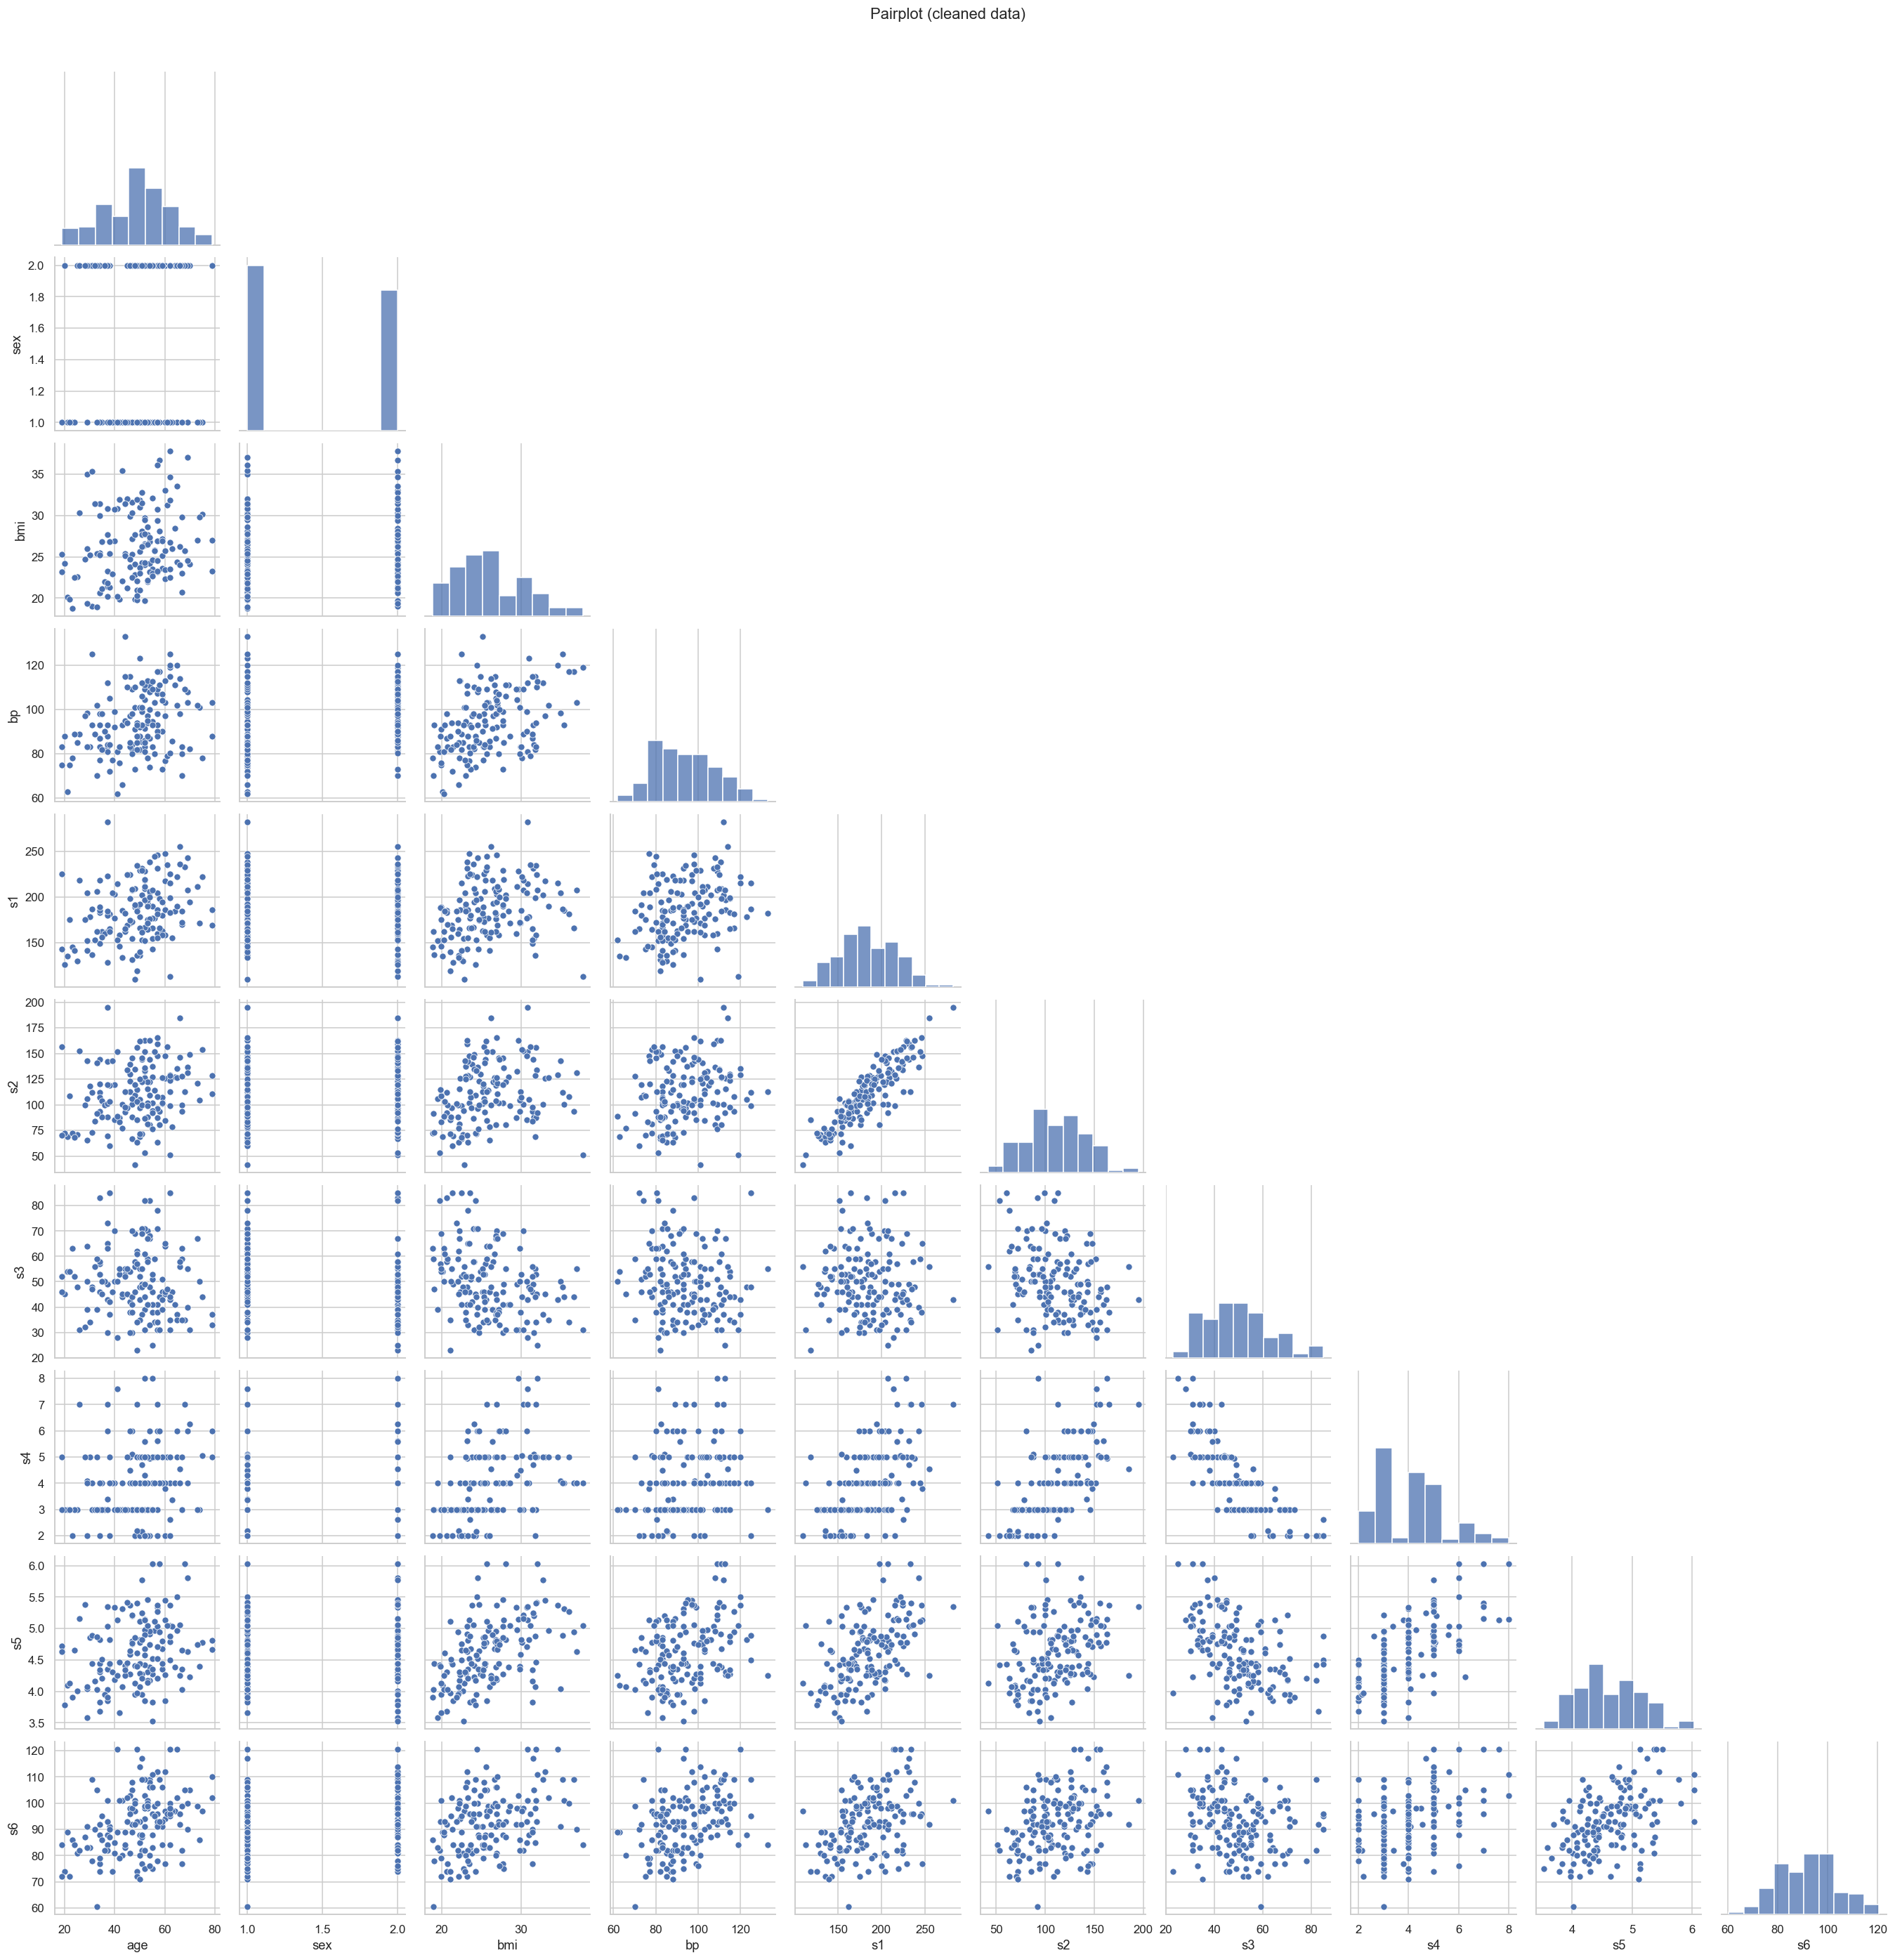

In [80]:
# Create pairplot subset to visualize feature relationships
feature_cols = [c for c in train_data_cleaned.columns if c != 'target']
sns.pairplot(train_data_cleaned.sample(min(150, len(train_data_cleaned))),
             vars=feature_cols,
             corner=True, diag_kind='hist')
plt.suptitle("Pairplot (cleaned data)", y=1.02)
plt.show()

Top 6 correlated features with target: ['bmi', 's5', 'bp', 's4', 's3', 's6']


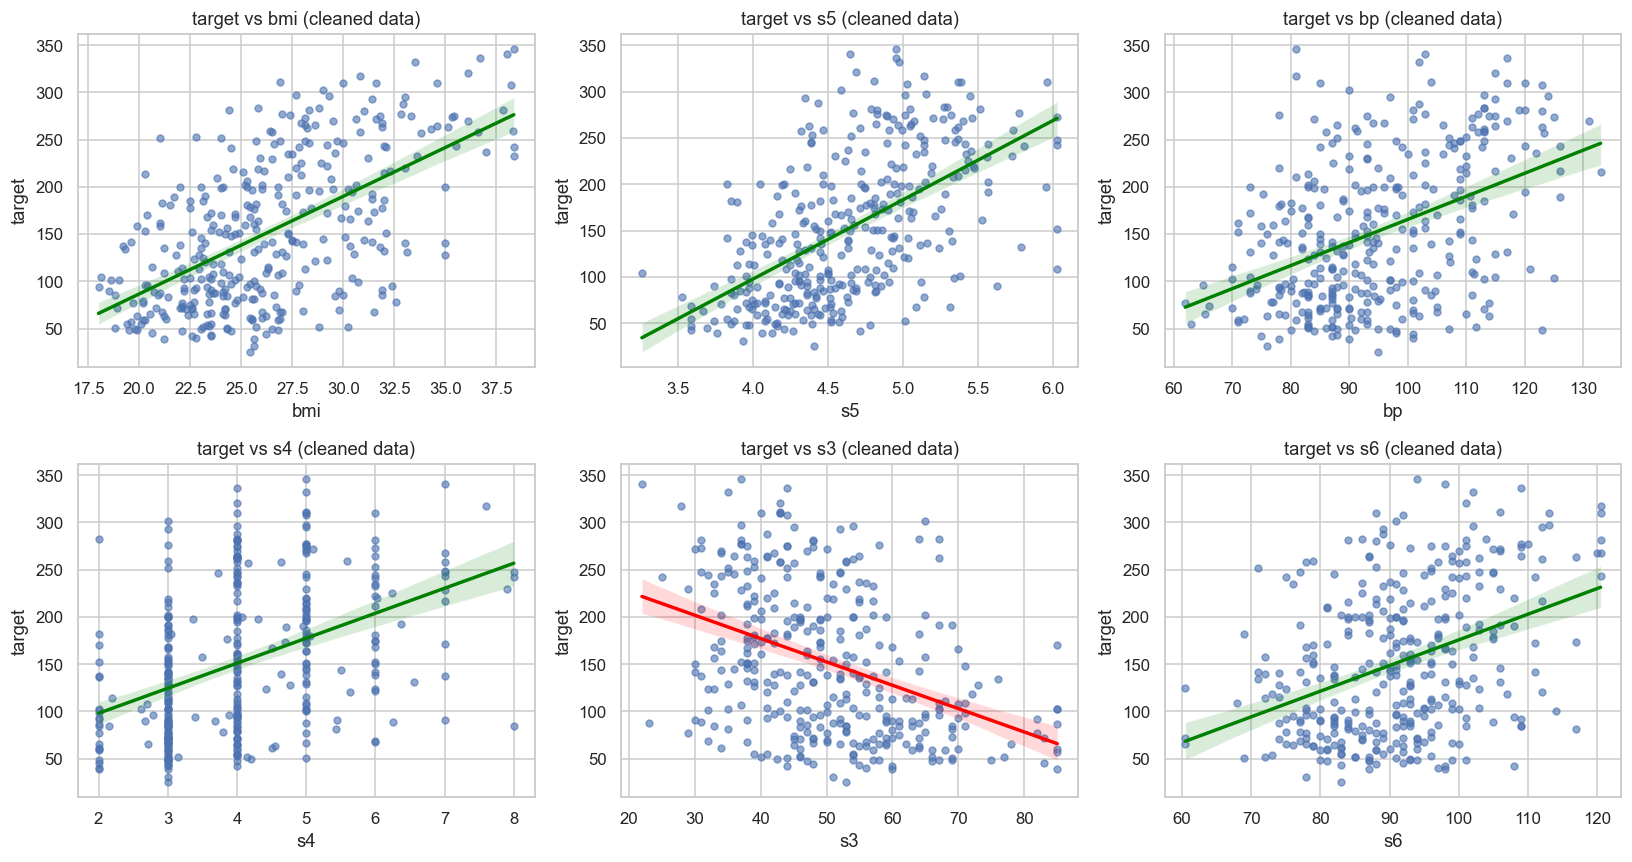

In [81]:
# Identify and plot top k features most correlated with target
target_corr = corr['target'].drop('target').abs().sort_values(ascending=False)
top_k = 6
top_features = target_corr.head(top_k).index.tolist()
print(f"Top {top_k} correlated features with target: {top_features}")

# Calculate grid dimensions dynamically
n_cols = 3  # or 2, depending on your preference
n_rows = int(np.ceil(top_k / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()
for ax, feat in zip(axes, top_features):
    # Get the actual correlation value (with sign)
    actual_corr = corr['target'][feat]
    line_color = 'green' if actual_corr > 0 else 'red'
    
    sns.regplot(x=train_data_cleaned[feat], y=train_data_cleaned['target'], ax=ax, 
                scatter_kws={'s': 20, 'alpha': 0.6}, 
                line_kws={'color': line_color})
    ax.set_title(f"target vs {feat} (cleaned data)")
# Hide unused subplots
for ax in axes[top_k:]:
    ax.axis('off')
plt.tight_layout()
plt.show()

### Part 2.3 - EDA Summary and Model Recommendation
After diving deep into our diabetes dataset, we discovered some really interesting patterns. The data shows strong linear relationships between medical measurements and diabetes progression - exactly what we'd expect in real medical data.

When we looked at the correlations, features like BMI, blood pressure, and serum measurements stood out as the most important predictors. This makes perfect sense from a medical perspective - these are the same factors doctors look at when assessing diabetes risk.

We also identified some multicollinearity between features (like s1 and s2 with 0.889 correlation), but we'll handle feature selection and engineering in Part 3 as part of our systematic experiments.

**Why Linear Regression is perfect for this dataset:**

The plots we created show clear straight-line relationships between our features and the target. Since we're predicting a continuous outcome (diabetes progression) and all our features are already scaled, linear regression is the natural choice.

With only 353 patients in our dataset, we need a model that won't get confused by the small sample size. Linear regression is stable and won't overfit like more complex models would. Plus, it gives us coefficients that actually mean something - we can tell doctors exactly how much each factor contributes to diabetes risk.

**Why other models just don't fit here:**

KNN would be too jumpy with our outliers and slow to run. Naive Bayes assumes our medical features are independent, but we know they're all related - blood pressure affects BMI, which affects serum levels, etc. Decision trees would probably create overly complicated rules that work great on our 353 patients but fail on new patients.

Linear regression hits the sweet spot - it's fast, stable, interpretable, and perfect for this type of medical prediction problem. In Part 3, we'll systematically test this hypothesis by comparing linear regression against KNN with different feature engineering approaches.

## Part 3 - Experiments

### Part 3.1 - Feature engineering

Feature engineering is the process of transforming raw data into features that better represent the underlying problem. For our diabetes dataset, we'll systematically test different preprocessing approaches to see which ones improve model performance.

**The feature engineering we'll test:**

1. **Scaling Methods**: Different algorithms respond differently to feature scaling:
   - **StandardScaler**: Centers data around 0 with standard deviation of 1
   - **No scaling**: Use data as-is (baseline)

2. **Feature Selection**: Using Pearson correlation to remove highly correlated features:
   - **With feature selection**: Remove highly correlated features (threshold > 0.8, like s1 and s2)
   - **Without feature selection**: Use all features (baseline)

This gives us 2×2 = 4 different feature engineering configurations. Each will be tested with both Linear Regression and KNN to find the optimal preprocessing approach.

In [82]:
# Feature Engineering Pipeline

def apply_feature_engineering(config, X_train, X_val, y_train):
    """
    Apply feature engineering based on configuration
    Returns processed training and validation sets
    """
    X_train_processed = X_train.copy()
    X_val_processed = X_val.copy()
    
    # 1. Feature selection using Pearson correlation (remove highly correlated features)
    if config['feature_selection'] == 'remove_correlated':
        X_train_processed, removed_features = remove_highly_correlated_features(X_train_processed, y_train)
        X_val_processed = X_val_processed.drop(columns=removed_features)
        print(f"Removed highly correlated features: {removed_features}")
    
    # 2. Scaling
    if config['scaling'] == 'standard':
        scaler = StandardScaler()
        X_train_processed = scaler.fit_transform(X_train_processed)
        X_val_processed = scaler.transform(X_val_processed)
    # No scaling for 'none'
    
    return X_train_processed, X_val_processed

def remove_highly_correlated_features(X, y, threshold=0.8):
    """
    Remove features with high correlation, keeping the one more correlated with target
    """
    corr_matrix = X.corr().abs()
    target_corr = X.corrwith(y).abs()
    
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_value = corr_matrix.iloc[i, j]
            if corr_value > threshold:
                high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_value))
    
    features_to_remove = set()
    for feat1, feat2, corr in high_corr_pairs:
        if target_corr[feat1] > target_corr[feat2]:
            features_to_remove.add(feat2)
        else:
            features_to_remove.add(feat1)
    
    return X.drop(columns=list(features_to_remove)), list(features_to_remove)

print("Feature engineering pipeline ready")

Feature engineering pipeline ready


In [83]:
# Define feature engineering configurations (simplified for group of 2)
feature_configs = [
    # Baseline
    {'scaling': 'none', 'feature_selection': 'none'},
    
    # Scaling only
    {'scaling': 'standard', 'feature_selection': 'none'},
    
    # Feature selection only
    {'scaling': 'none', 'feature_selection': 'remove_correlated'},
    
    # Both scaling and feature selection
    {'scaling': 'standard', 'feature_selection': 'remove_correlated'},
]


### Part 3.2 - Model and Hyperparameter Experiments

Now we'll test different machine learning algorithms with various hyperparameter settings. We'll compare Linear Regression against K-Nearest Neighbors (KNN) to demonstrate why Linear Regression is better suited for this diabetes prediction problem.

**Linear Regression Configurations:**
- **fit_intercept**: [True, False] - Tests whether we need to calculate an intercept term or if the data is already centered

**K-Nearest Neighbors Configurations:**
- **n_neighbors**: [3, 15] - Tests different neighborhood sizes (small vs large)
- **weights**: ['uniform', 'distance'] - Tests different ways to weight the neighbors

This gives us 2 Linear Regression configurations and 4 KNN configurations (2×2), for a total of 6 model configurations. Combined with our 4 feature engineering approaches, we'll run 24 total experiments.

**Why we expect Linear Regression to win:**
1. **Linear relationships**: Our EDA showed clear linear patterns between features and diabetes progression
2. **Small dataset**: With only 353 samples, simpler models like Linear Regression are more stable
3. **Preprocessed features**: The diabetes data is already scaled and normalized
4. **Medical interpretability**: Linear Regression coefficients tell us exactly how much each factor contributes to diabetes risk

In [84]:
model_configs = [
    # Linear Regression configurations
    {'model': 'linear_regression', 'fit_intercept': True},
    {'model': 'linear_regression', 'fit_intercept': False},
    
    # KNN configurations
    {'model': 'knn', 'n_neighbors': 3, 'weights': 'uniform'},
    {'model': 'knn', 'n_neighbors': 3, 'weights': 'distance'},
    {'model': 'knn', 'n_neighbors': 15, 'weights': 'uniform'},
    {'model': 'knn', 'n_neighbors': 15, 'weights': 'distance'},
]

def create_model(config):
    """
    Create model instance based on configuration
    """
    if config['model'] == 'linear_regression':
        return LinearRegression(fit_intercept=config['fit_intercept'])
    elif config['model'] == 'knn':
        return KNeighborsRegressor(
            n_neighbors=config['n_neighbors'],
            weights=config['weights']
        )

### Part 3.3 - Quality Metric Usage

For this regression problem, we need to choose the right quality metric to evaluate our models. Since we're predicting diabetes progression (a continuous value), we'll use R² (R-squared) as our primary metric.

**Why R² is perfect for this problem:**
- R² measures how much of the variance in diabetes progression is explained by our model
- It ranges from 0 to 1, making it easy to interpret
- Values close to 1 mean our model explains most of the variation in the data
- Values close to 0 mean our model isn't much better than just predicting the average

**How we'll use R²:**
1. **During experiments**: 5-fold cross-validation to compare different model configurations
2. **Final evaluation**: Test set evaluation to estimate real-world performance

This will help us objectively determine whether Linear Regression or KNN performs better for predicting diabetes progression, and which feature engineering approaches work best.

In [85]:
# Setup quality metric for experiments
def evaluate_model(model, X, y, kfold):
    """
    Evaluate model using R² with cross-validation
    Returns mean CV score and standard deviation
    Note: Using 5-fold CV due to small sample size (352 samples)
    """
    cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')
    return cv_scores.mean(), cv_scores.std()

def final_evaluation(model, X_test, y_test):
    """
    Final evaluation on test set with comprehensive metrics
    """
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    
    return {
        'r2': r2,
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'predictions': y_pred
    }

print("Quality metric setup complete - using R² for model evaluation")

Quality metric setup complete - using R² for model evaluation


### Part 3.4 - Grid-Search K-Fold Cross-Validation with Experiments

Now we'll systematically test all combinations using 5-fold cross-validation. This is the heart of our experimental process where we'll run all 24 combinations (4 feature configs × 6 model configs) to find the best performing setup.

**Our systematic approach:**
1. **Split training data**: We'll split our training data into train/validation sets for each experiment
2. **Apply feature engineering**: Each configuration will be applied to both training and validation sets
3. **Cross-validation**: We'll use 5-fold CV on the training portion to get robust performance estimates
4. **Validation**: We'll also test on the held-out validation set to prevent overfitting
5. **Record results**: All 24 combinations will be evaluated and compared

**Why this approach is robust:**
- **No data leakage**: Test set remains completely untouched until final evaluation
- **Fair comparison**: All models are evaluated using the same methodology
- **Statistical significance**: 5-fold CV gives us confidence in our results
- **Overfitting prevention**: Validation set helps us select the best generalizing model

We'll use the validation scores to select the best configuration, then train the final model on the full training set and evaluate on the test set.

In [86]:
# Data preparation for experiments
# Note: We only have access to training set for now, test set will be used only in Part 5
# Split the training data into features and target
X_train = train_data_cleaned.drop('target', axis=1)
y_train = train_data_cleaned['target']

print(f"Training data shape: {X_train.shape}")
print(f"Target shape: {y_train.shape}")
print(f"Features: {list(X_train.columns)}")
print(f"Note: Test set will be used only in Part 5 for final evaluation")

Training data shape: (353, 10)
Target shape: (353,)
Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Note: Test set will be used only in Part 5 for final evaluation


In [87]:
# Use 5-fold cross-validation on training set (test set remains untouched until Part 5)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

print(f"Using 5-fold cross-validation on training set:")
print(f"Training set shape: {X_train.shape}")
print(f"Each fold: 80% train (~282 samples), 20% validation (~71 samples)")
print(f"Note: Test set will be used only in Part 5 for final evaluation")

# Run all experiments
results = []
experiment_count = 0
total_experiments = len(feature_configs) * len(model_configs)

for feature_config in feature_configs:
    for model_config in model_configs:
        experiment_count += 1
        print(f"\nExperiment {experiment_count}/{total_experiments}")
        print(f"Feature config: {feature_config}")
        print(f"Model config: {model_config}")
        
        try:
            # Apply feature engineering to full training set
            X_processed, _ = apply_feature_engineering(
                feature_config, X_train, X_train, y_train
            )
            
            # Create model
            model = create_model(model_config)
            
            # 5-fold cross-validation
            cv_mean, cv_std = evaluate_model(model, X_processed, y_train, kfold)
            
            # Store results
            result = {
                'experiment_id': experiment_count,
                'feature_config': feature_config,
                'model_config': model_config,
                'cv_mean': cv_mean,
                'cv_std': cv_std,
                'feature_count': X_processed.shape[1]
            }
            results.append(result)
            
            print(f"CV R²: {cv_mean:.4f} ± {cv_std:.4f}")
            
        except Exception as e:
            print(f"Error in experiment {experiment_count}: {e}")
            continue

print(f"\nCompleted {len(results)} experiments successfully")

Using 5-fold cross-validation on training set:
Training set shape: (353, 10)
Each fold: 80% train (~282 samples), 20% validation (~71 samples)
Note: Test set will be used only in Part 5 for final evaluation

Experiment 1/24
Feature config: {'scaling': 'none', 'feature_selection': 'none'}
Model config: {'model': 'linear_regression', 'fit_intercept': True}
CV R²: 0.4825 ± 0.0800

Experiment 2/24
Feature config: {'scaling': 'none', 'feature_selection': 'none'}
Model config: {'model': 'linear_regression', 'fit_intercept': False}
CV R²: 0.4410 ± 0.0794

Experiment 3/24
Feature config: {'scaling': 'none', 'feature_selection': 'none'}
Model config: {'model': 'knn', 'n_neighbors': 3, 'weights': 'uniform'}
CV R²: 0.0942 ± 0.1060

Experiment 4/24
Feature config: {'scaling': 'none', 'feature_selection': 'none'}
Model config: {'model': 'knn', 'n_neighbors': 3, 'weights': 'distance'}
CV R²: 0.0973 ± 0.1119

Experiment 5/24
Feature config: {'scaling': 'none', 'feature_selection': 'none'}
Model confi

In [88]:
# Analyze experiment results
results_df = pd.DataFrame(results)

# Sort by CV score (best first)
results_df_sorted = results_df.sort_values('cv_mean', ascending=False)

print("Top 10 Experiment Results:")
print("=" * 80)
for i, row in results_df_sorted.head(10).iterrows():
    print(f"Rank {results_df_sorted.index.get_loc(i)+1}:")
    print(f"  Feature Config: {row['feature_config']}")
    print(f"  Model Config: {row['model_config']}")
    print(f"  CV R²: {row['cv_mean']:.4f} ± {row['cv_std']:.4f}")
    print(f"  Features: {row['feature_count']}")
    print()

# Find best configuration
best_result = results_df_sorted.iloc[0]
print(f"BEST CONFIGURATION:")
print(f"Feature Engineering: {best_result['feature_config']}")
print(f"Model: {best_result['model_config']}")
print(f"CV R²: {best_result['cv_mean']:.4f} ± {best_result['cv_std']:.4f}")

Top 10 Experiment Results:
Rank 1:
  Feature Config: {'scaling': 'none', 'feature_selection': 'none'}
  Model Config: {'model': 'linear_regression', 'fit_intercept': True}
  CV R²: 0.4825 ± 0.0800
  Features: 10

Rank 2:
  Feature Config: {'scaling': 'standard', 'feature_selection': 'none'}
  Model Config: {'model': 'linear_regression', 'fit_intercept': True}
  CV R²: 0.4825 ± 0.0800
  Features: 10

Rank 3:
  Feature Config: {'scaling': 'none', 'feature_selection': 'remove_correlated'}
  Model Config: {'model': 'linear_regression', 'fit_intercept': True}
  CV R²: 0.4771 ± 0.0846
  Features: 9

Rank 4:
  Feature Config: {'scaling': 'standard', 'feature_selection': 'remove_correlated'}
  Model Config: {'model': 'linear_regression', 'fit_intercept': True}
  CV R²: 0.4771 ± 0.0846
  Features: 9

Rank 5:
  Feature Config: {'scaling': 'none', 'feature_selection': 'none'}
  Model Config: {'model': 'linear_regression', 'fit_intercept': False}
  CV R²: 0.4410 ± 0.0794
  Features: 10

Rank 6:
  

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

## Part 5 - Apply on test and show model performance estimation